<a href="https://colab.research.google.com/github/Thiaguinho92/Projetowalmart/blob/main/Projetowalmartnovoatual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Premissas do projeto:
Qual o preço média semanal de vendas por loja? 
**$1,046,964.39** 

Qual atributo tem maior correlação(positiva ou negativa) com o número de vendas?
 **O atributo com maior correlação positiva é o feriado (0,037) e o de maior correlação negativa é o número de lojas que tem uma correlação de -0,34.**

Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período? 
***20 - 143 vezes no período informado***

Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima?

pensando na expansão de uma das lojas, que loja você escolheria e por que? Loja 10 pois é a 6 loja em vendas da companhia, possui vendas acima da média e um máximo bem semelhante as lojas com vendas maiores, porém a loja 10 tem quase metade do tamanho das lojas informadas.
obs.: realizamos uma pesquisa sobre o dataset e encontramos informações de tamanho de loja que foi crucial para identificarmos essa loja como a escolhida para a expansão.

In [ ]:
# Bibliotecas utilizadas no dataset

import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
walmart3 = pd.read_csv('/content/stores.csv')
walmart3.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
# Dataset importado para análise

walmart = pd.read_csv('/content/Walmart.csv')
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# As colunas foram renomeadas para facilitar o entendimento
walmart_renomed = walmart.rename(columns={
                                              'Store':'Número_loja',
                                              'Date': 'Data',
                                              'Weekly_Sales': 'Venda_Semanal',
                                              'Holiday_Flag': 'Feriado_Na_Semana',
                                              'Temperature': 'Temperatura',
                                              'Fuel_Price': 'Preço_Combústivel_Região',
                                              'CPI': 'Índice de preços',
                                              'Unemployment': 'Taxa de desemprego',
                                             
})
walmart_renomed.head()

,Número_loja,Data,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# A tabela possui 4 feriados distintos e nessa etapa, foi realizada a identificação de cada um desses feriados

walmart_renomed['Feriado'] = walmart_renomed['Data'].apply(lambda x: 'Super Bowl' if x in ['12-02-2010', '11-02-2011', '10-02-2012']
                                             else 'Labour Day' if x in ['10-09-2012', '11-09-2011', '07-09-2012']
                                             else 'Christmas' if x in ['31-12-2010', '30-12-2011', '28-12-2012']
                                             else 'Thanksgiving' if x in ['26-11-2010', '25-11-2011', '23-11-2012']
                                             else 'Sem Feriado')
walmart_renomed.head()


,Número_loja,Data,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego,Feriado
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Sem Feriado
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Sem Feriado
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Sem Feriado
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Sem Feriado


In [ ]:
# Identificando os tipos de dados
walmart_renomed.dtypes

Número_loja                   int64
Data                         object
Venda_Semanal               float64
Feriado_Na_Semana             int64
Temperatura                 float64
Preço_Combústivel_Região    float64
Índice de preços            float64
Taxa de desemprego          float64
Feriado                      object
dtype: object

In [ ]:
#Obtendo informações sobre dados nulos
walmart_renomed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Número_loja               6435 non-null   int64  
 1   Data                      6435 non-null   object 
 2   Venda_Semanal             6435 non-null   float64
 3   Feriado_Na_Semana         6435 non-null   int64  
 4   Temperatura               6435 non-null   float64
 5   Preço_Combústivel_Região  6435 non-null   float64
 6   Índice de preços          6435 non-null   float64
 7   Taxa de desemprego        6435 non-null   float64
 8   Feriado                   6435 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 452.6+ KB


In [ ]:
#Descrevendo as informações dos dados
walmart_renomed.describe()

,Número_loja,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# Nessa etapa foi adicionada uma coluna de Ano e Mês
walmart_renomed['Data'] = pd.to_datetime(walmart_renomed['Data'])
walmart_renomed['Ano'] = walmart_renomed['Data'].dt.strftime('%Y');
walmart_renomed['Mês'] = walmart_renomed['Data'].dt.strftime('%m');
#walmart_renomed['Ano_Mês'] = pd.to_datetime(walmart_renomed['Ano_Mês'])

# Criando uma nova coluna com o trimestre de cada data
#walmart_renomed['Trimestre'] = walmart_renomed['Ano_Mês'].dt.quarter
walmart_renomed.head()

<ipython-input-12-a500848d592b>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  walmart_renomed['Data'] = pd.to_datetime(walmart_renomed['Data'])


,Número_loja,Data,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego,Feriado,Ano,Mês
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sem Feriado,2010,05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Sem Feriado,2010,02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Sem Feriado,2010,02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Sem Feriado,2010,05


In [ ]:
Venda_Mês = walmart_renomed.groupby('Mês')['Venda_Semanal','Temperatura', 'Preço_Combústivel_Região', 'Taxa de desemprego'].mean().reset_index();
#Venda_Mês = Venda_Mês.sort_values(by='Venda_Semanal', ascending=False)
Venda_Mês.head()

<ipython-input-13-eb3e2bd36c6b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Venda_Mês = walmart_renomed.groupby('Mês')['Venda_Semanal','Temperatura', 'Preço_Combústivel_Região', 'Taxa de desemprego'].mean().reset_index();


,Mês,Venda_Semanal,Temperatura,Preço_Combústivel_Região,Taxa de desemprego
0,01,9.476139e+05,49.474156,3.330407,7.954104
1,02,1.054597e+06,50.208061,3.208756,8.106729
2,03,1.024975e+06,57.414333,3.409254,8.012141
3,04,1.024324e+06,56.874238,3.493933,8.036143
4,05,1.035379e+06,62.361692,3.394745,8.119055


Text(0, 0.5, '')

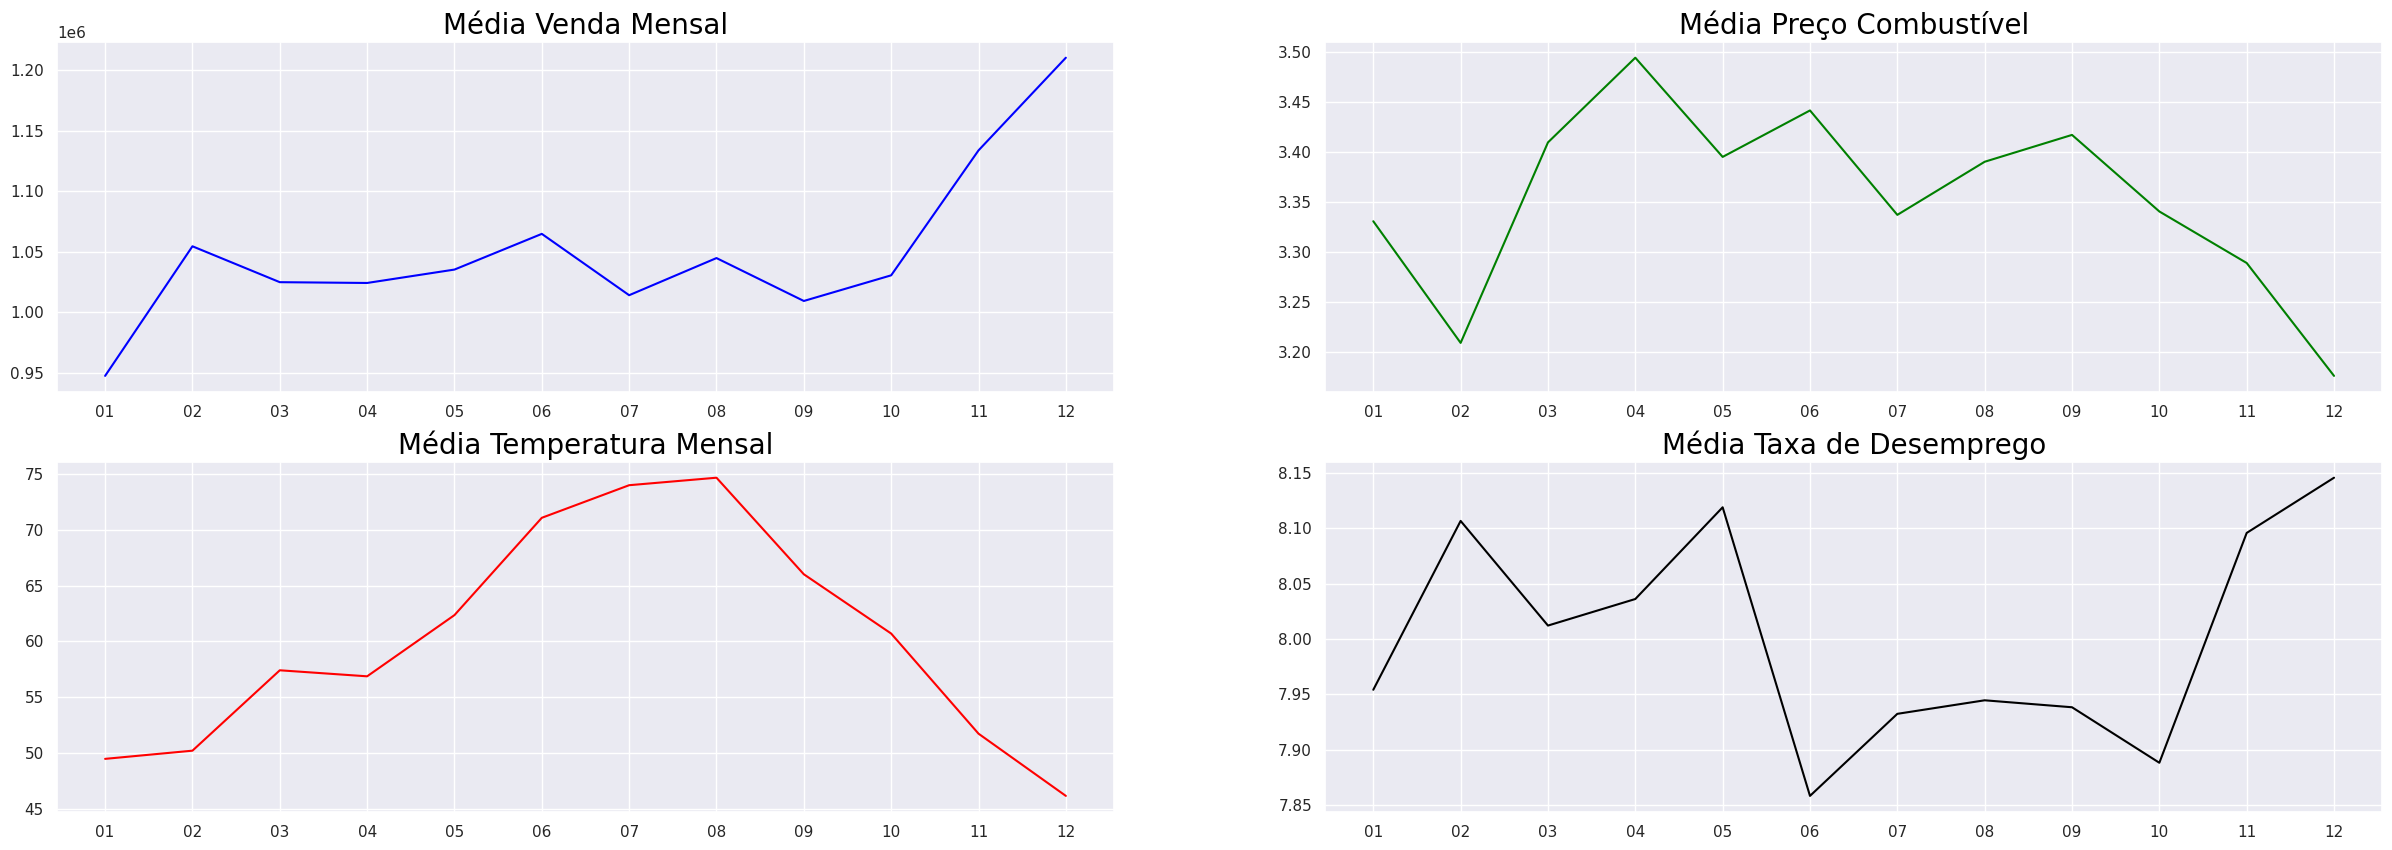

In [ ]:
# Gráfico de linha para verificar como as variáveis se comportam ao longo do ano
fig, axes = plt.subplots(2, 2, figsize=(30,10))

sns.set_style("dark");

sns.lineplot(data=Venda_Mês, x="Mês", y="Venda_Semanal", color='blue', ax=axes[0,0])
sns.lineplot(data=Venda_Mês, x="Mês", y="Temperatura", color='red', ax=axes[1,0]);
sns.lineplot(data=Venda_Mês, x="Mês", y="Preço_Combústivel_Região", color='green', ax=axes[0,1]);
sns.lineplot(data=Venda_Mês, x="Mês", y="Taxa de desemprego", color='black', ax=axes[1,1]);

# Adicionando títulos e removendo eixos
axes[0,0].set_title('Média Venda Mensal', fontdict={'fontsize': 20, 'color': 'black'})
axes[1,0].set_title('Média Temperatura Mensal', fontdict={'fontsize': 20, 'color': 'black'})
axes[0,1].set_title('Média Preço Combustível', fontdict={'fontsize': 20, 'color': 'black'})
axes[1,1].set_title('Média Taxa de Desemprego', fontdict={'fontsize': 20, 'color': 'black'})


# Removendo títulos dos eixos x e y
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')



Text(0.5, 1.0, 'Dados de Venda, Temperatura, Preço do Combustível e Taxa de Desemprego')

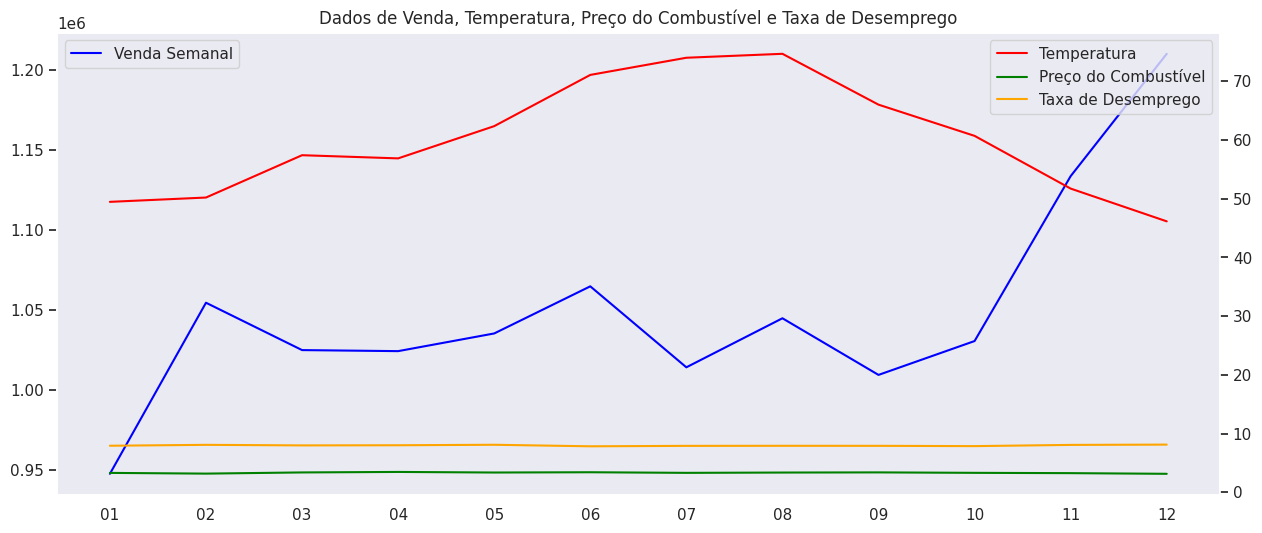

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))

# plotar dados de venda
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.plot(Venda_Mês['Mês'], Venda_Mês['Venda_Semanal'], color='blue')

# criar segundo eixo y
ax2 = ax1.twinx()

# plotar dados de temperatura, preço do combustível e taxa de desemprego
ax2.set_ylabel('')
ax2.plot(Venda_Mês['Mês'], Venda_Mês['Temperatura'], color='red')
ax2.plot(Venda_Mês['Mês'], Venda_Mês['Preço_Combústivel_Região'], color='green')
ax2.plot(Venda_Mês['Mês'], Venda_Mês['Taxa de desemprego'], color='orange')

# definir legendas
ax1.legend(['Venda Semanal'], loc='upper left')
ax2.legend(['Temperatura', 'Preço do Combustível', 'Taxa de Desemprego'], loc='upper right')

# definir título do gráfico
plt.title('Dados de Venda, Temperatura, Preço do Combustível e Taxa de Desemprego')

# O mês de dezembro possui a melhor média de venda da companhia, porém essa venda não ocorre necessariamente na semana do feriado de Christmas

In [ ]:
#Venda acumulado no período analisado

Venda_total = walmart_renomed['Venda_Semanal'].sum()

Venda_total

6737218987.11

In [ ]:
# Loja com maior valor de venda acumulada - loja 20, Vendeu mais do que a média 143 vezes, ou seja, durante todo o período informado

Loja_20 = walmart_renomed[walmart_renomed["Número_loja"] ==20]

Loja_20 = Loja_20[Loja_20['Venda_Semanal'] > 1046964]
Loja_20.head()

,Número_loja,Data,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego,Feriado,Ano,Mês
2717,20,2010-05-02,2401395.47,0,25.92,2.784,204.247194,8.187,Sem Feriado,2010,05
2718,20,2010-12-02,2109107.90,1,22.12,2.773,204.385747,8.187,Super Bowl,2010,12
2719,20,2010-02-19,2161549.76,0,25.43,2.745,204.432100,8.187,Sem Feriado,2010,02
2720,20,2010-02-26,1898193.95,0,32.32,2.754,204.463087,8.187,Sem Feriado,2010,02
2721,20,2010-05-03,2119213.72,0,31.75,2.777,204.494073,8.187,Sem Feriado,2010,05


In [ ]:
# A melhor média de venda da loja ocorreu durante o feriado de Thanksgiving
Média_loja20 = Loja_20.groupby(['Feriado']).mean().reset_index();
Média_loja20.head()

<ipython-input-18-6f902a721291>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Média_loja20 = Loja_20.groupby(['Feriado']).mean().reset_index();


,Feriado,Número_loja,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego
0,Christmas,20.0,1.921491e+06,1.000000,32.600000,3.284000,208.523402,7.283000
1,Labour Day,20.0,2.080529e+06,1.000000,76.360000,3.911000,215.218957,7.280000
2,Sem Feriado,20.0,2.096096e+06,0.014815,56.399852,3.422637,209.038756,7.371919
3,Super Bowl,20.0,2.261158e+06,1.000000,26.990000,3.217333,207.860249,7.497000
4,Thanksgiving,20.0,2.858934e+06,1.000000,46.520000,3.265500,208.187088,7.283000


In [ ]:
Preço_Médio = walmart_renomed.groupby('Número_loja')['Venda_Semanal'].mean().reset_index()

Preço_Médio.head()

,Número_loja,Venda_Semanal
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05


In [ ]:
# Criando variável para plotar gráfico de média móvel

Média_Móvel = Preço_Médio['Venda_Semanal'].rolling(window=3).mean().reset_index()


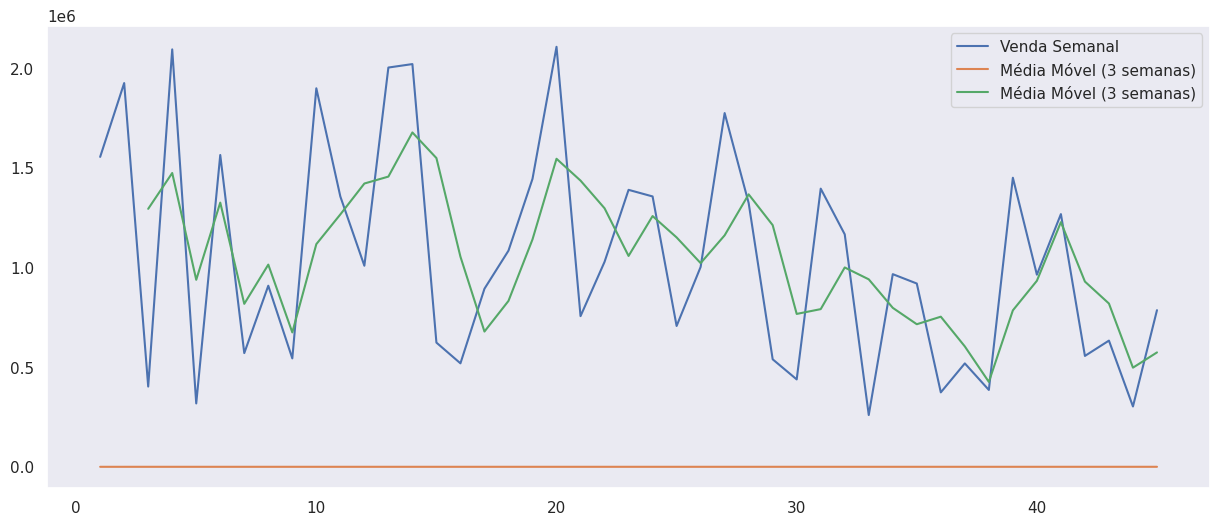

In [ ]:
# Plotando gráfico de média móvel
plt.figure(figsize=(15, 6))
plt.plot(Preço_Médio['Número_loja'], Preço_Médio['Venda_Semanal'], label='Venda Semanal')
plt.plot(Preço_Médio['Número_loja'], Média_Móvel, label='Média Móvel (3 semanas)')
plt.legend();


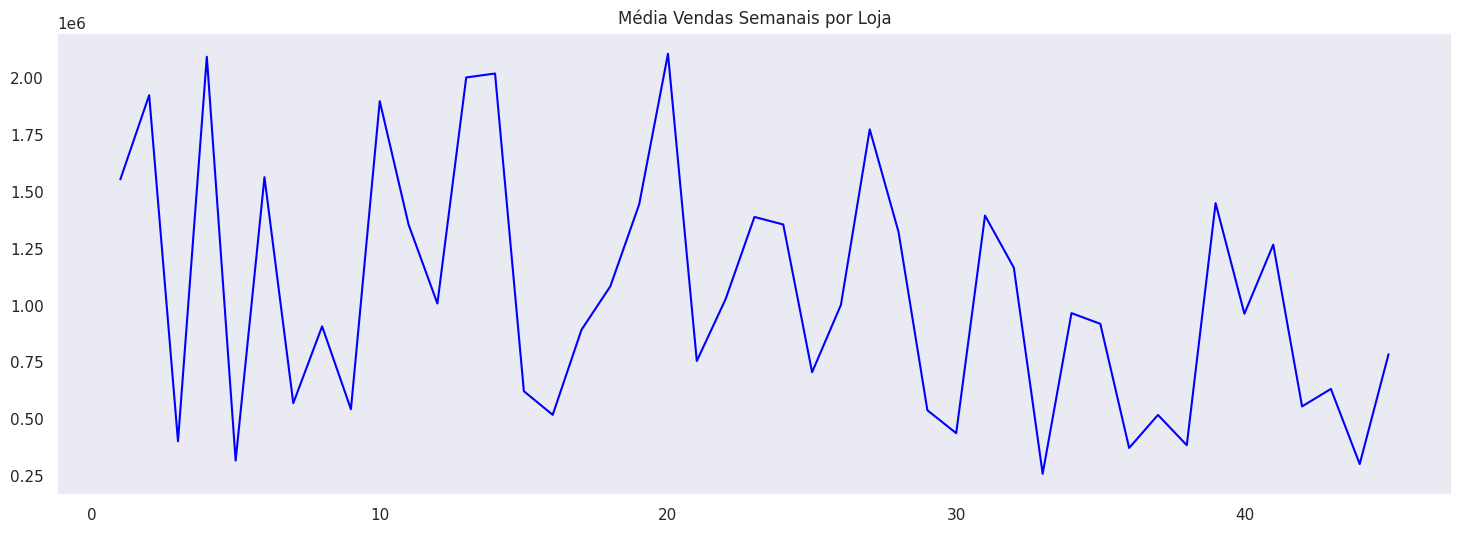

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(18,6))

sns.set(style="darkgrid")

# crie o gráfico de linha para acompanhar o desempenho médio de venda das lojas
ax = sns.lineplot(x="Número_loja", y="Venda_Semanal", data=Preço_Médio, color="blue")
ax.set_xlabel('')
ax.set_ylabel('')

# defina o título do gráfico
ax.set_title("Média Vendas Semanais por Loja")

# defina os rótulos dos dados no eixo y
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', rotation=45, fontsize=8, color='gray', xytext=(0, 20),
                textcoords='offset points')

In [ ]:
# Correlacionando os dados e identificando quais dados possuem maior correlação positiva ou negativa com as vendas
Média_Venda = walmart_renomed.groupby('Feriado')['Venda_Semanal','Feriado_Na_Semana',	'Temperatura',	'Preço_Combústivel_Região',	'Índice de preços',	'Taxa de desemprego', 'Feriado'].mean().reset_index()
Média_Venda



<ipython-input-23-6c70bdd313f2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Média_Venda = walmart_renomed.groupby('Feriado')['Venda_Semanal','Feriado_Na_Semana',	'Temperatura',	'Preço_Combústivel_Região',	'Índice de preços',	'Taxa de desemprego', 'Feriado'].mean().reset_index()
<ipython-input-23-6c70bdd313f2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Média_Venda = walmart_renomed.groupby('Feriado')['Venda_Semanal','Feriado_Na_Semana',	'Temperatura',	'Preço_Combústivel_Região',	'Índice de preços',	'Taxa de desemprego', 'Feriado'].mean().reset_index()


,Feriado,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego
0,Christmas,9.608331e+05,1.000000,37.354444,3.159644,171.257101,8.139756
1,Labour Day,1.074001e+06,1.000000,78.038667,3.842556,176.014468,7.237333
2,Sem Feriado,1.041040e+06,0.014815,61.618502,3.365996,171.580398,7.997507
3,Super Bowl,1.079128e+06,1.000000,35.386148,3.119074,170.625604,8.139615
4,Thanksgiving,1.471273e+06,1.000000,48.758556,3.176133,170.975583,8.139756


<ipython-input-24-078e5cf6d0f4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(walmart_renomed.corr(), annot=True, cmap='coolwarm');


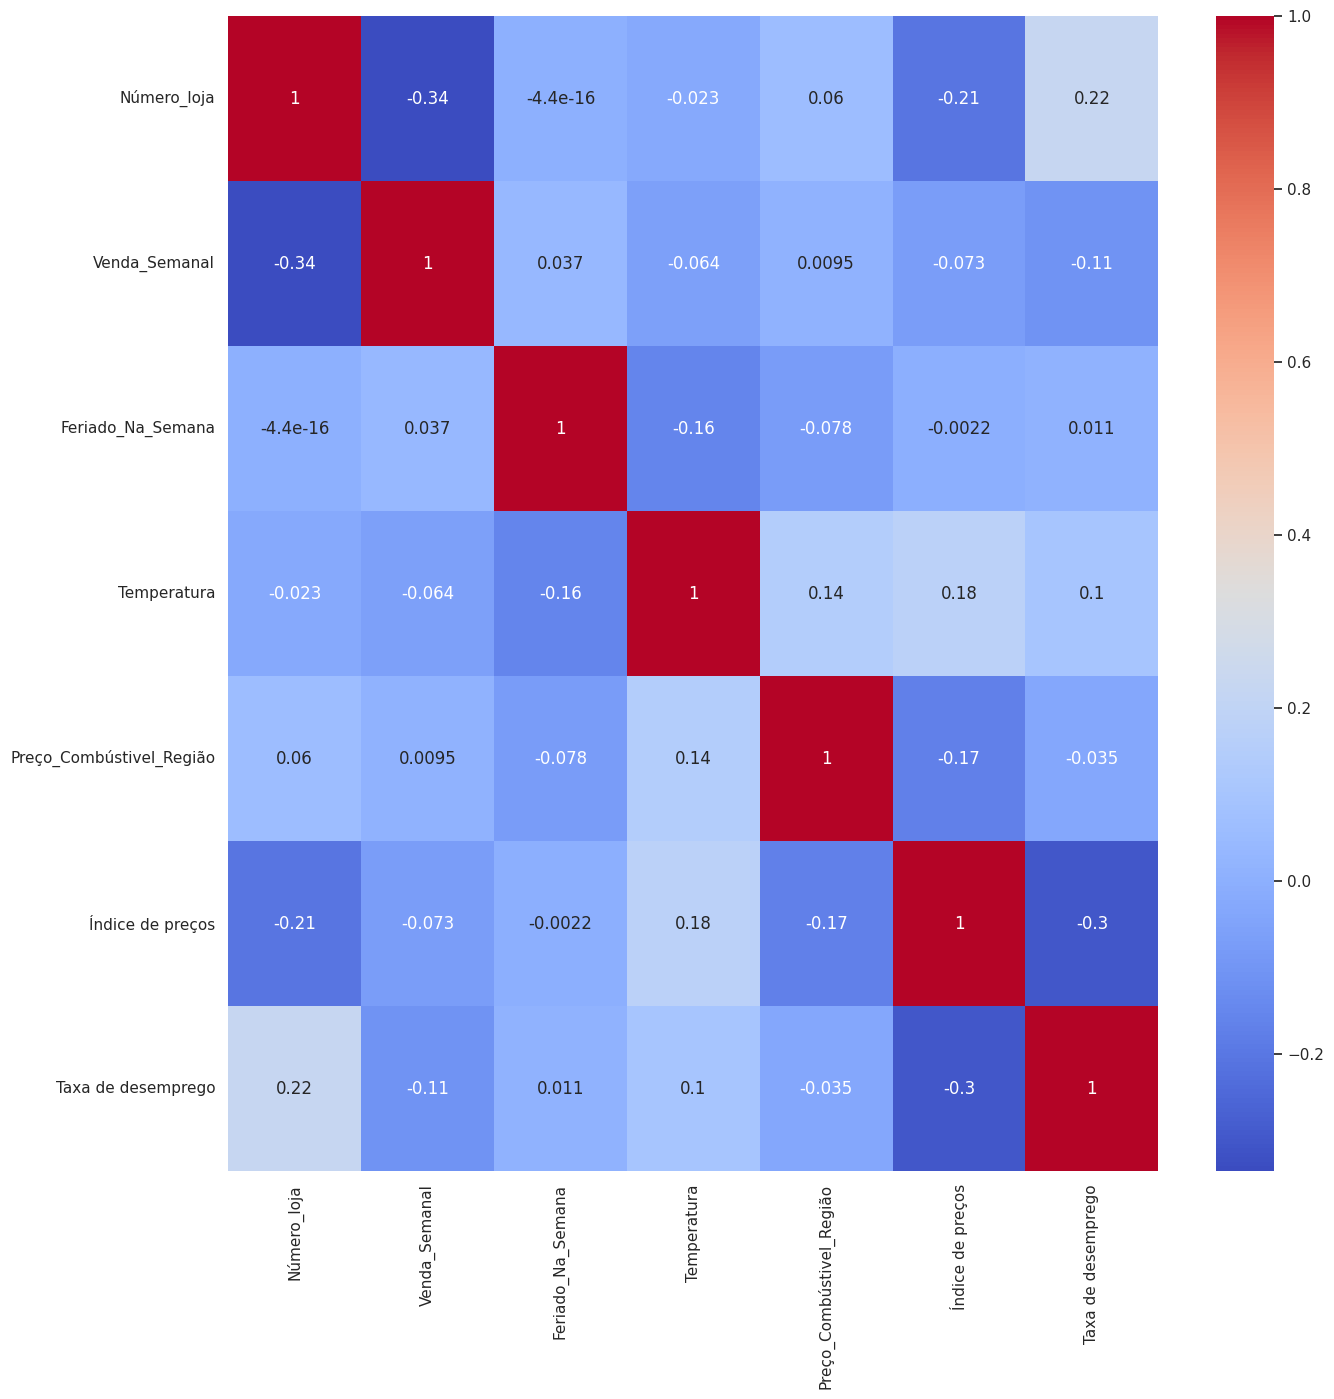

In [ ]:
#plt.figure(figsize=(10, 10));
#sns.pairplot(walmart_renomed, kind='scatter')
#walmart_renomed.drop(['Venda_Semanal'], axis=1, inplace=True)
plt.figure(figsize=(15, 15))
sns.heatmap(walmart_renomed.corr(), annot=True, cmap='coolwarm');

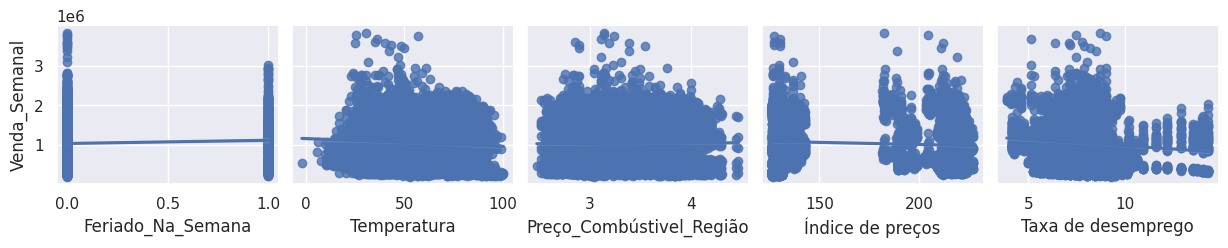

In [ ]:
sns.pairplot(walmart_renomed, x_vars=['Feriado_Na_Semana', 'Temperatura',	'Preço_Combústivel_Região',	'Índice de preços',	'Taxa de desemprego'], y_vars=['Venda_Semanal'], kind='reg')

In [ ]:
Max_venda_loja = walmart_renomed.groupby('Número_loja')['Feriado', 'Venda_Semanal'].sum().reset_index()
Max_venda_loja = Max_venda_loja.sort_values(by='Venda_Semanal', ascending=False)
#Max_venda_loja = walmart_renomed.groupby('Número_loja')['Feriado', 'Venda_Semanal'].min()
Max_venda_loja.head(5)

<ipython-input-36-9fcb74d0d05c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Max_venda_loja = walmart_renomed.groupby('Número_loja')['Feriado', 'Venda_Semanal'].sum().reset_index()
<ipython-input-36-9fcb74d0d05c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Max_venda_loja = walmart_renomed.groupby('Número_loja')['Feriado', 'Venda_Semanal'].sum().reset_index()


,Número_loja,Venda_Semanal
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [ ]:
Max_venda_loja = walmart_renomed.groupby(['Número_loja', 'Feriado'])['Venda_Semanal'].agg(['max', 'min', 'mean']).astype(int).reset_index()
Max_venda_loja = Max_venda_loja.sort_values(by='max', ascending=False)
Max_venda_loja.head()

,Número_loja,Feriado,max,min,mean
67,14,Sem Feriado,3818686,1479514,2016211
97,20,Sem Feriado,3766687,1761016,2096095
47,10,Sem Feriado,3749057,1627707,1880527
17,4,Sem Feriado,3676388,1762539,2082013
62,13,Sem Feriado,3595903,1633663,1992832


In [ ]:
Max_group = Max_venda_loja.groupby(['Feriado']).mean().reset_index()
Max_group['mean'] = Max_group['mean'].astype(int)
Max_group = Max_group.sort_values(by='mean', ascending=False)
Max_group.head()

,Feriado,Número_loja,max,min,mean
4,Thanksgiving,23.0,1.499360e+06,1.443186e+06,1471272
3,Super Bowl,23.0,1.131402e+06,1.030246e+06,1079127
1,Labour Day,23.0,1.074001e+06,1.074001e+06,1074000
2,Sem Feriado,23.0,1.816285e+06,8.334991e+05,1041039
0,Christmas,23.0,1.026177e+06,8.954884e+05,960832


Text(0, 0.5, '')

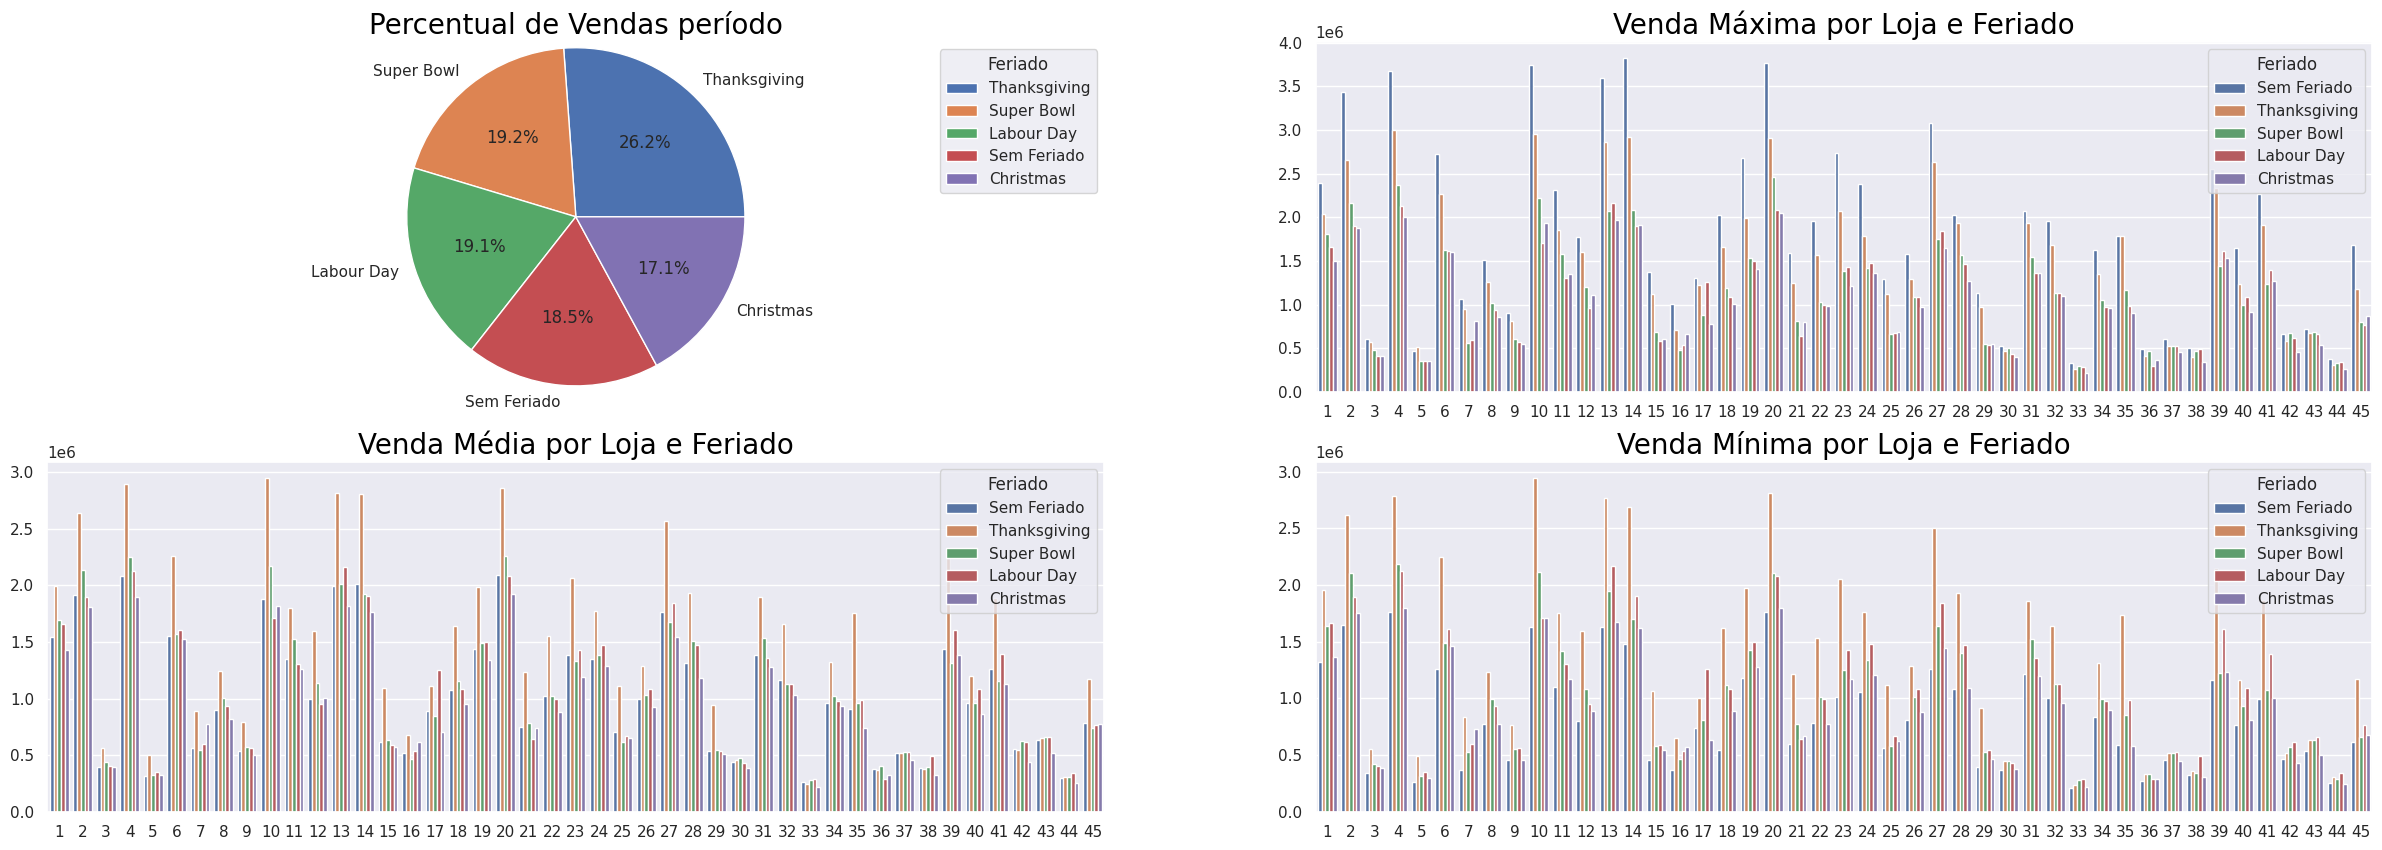

In [ ]:
# GRÁFICO COM A SEABORN

#fig, axes = plt.subplots(2, 2, figsize=(30,10))

#sns.set_style("dark")

#sns.barplot(data=Max_venda_loja, x="Número_loja", y="max", hue='Feriado', ax=axes[0,1])
#sns.barplot(data=Max_venda_loja, x="Número_loja", y="mean", hue='Feriado', ax=axes[1,0])
#sns.barplot(data=Max_venda_loja, x="Número_loja", y="min", hue='Feriado', ax=axes[1,1])

#ax = axes[0,0].twinx()
#ax.pie(Max_group['mean'], labels=Max_group['Feriado'], autopct='%1.1f%%', radius=0.5)
#ax.set_title('Percentual de Total de Contas por Dia')
#ax.legend(title='Feriado', loc='upper right')
# Ajustar as legendas e títulos
#axes[0,1].legend(title='Venda Máxima')
#axes[1,0].legend(title='Venda Média')
#axes[1,1].legend(title='Venda Mínima')
#axes[0,0].set_axis_off()

fig, axes = plt.subplots(2, 2, figsize=(30,10))

sns.set_style("dark")

sns.barplot(data=Max_venda_loja, x="Número_loja", y="max", hue='Feriado', ax=axes[0,1])
sns.barplot(data=Max_venda_loja, x="Número_loja", y="mean", hue='Feriado', ax=axes[1,0])
sns.barplot(data=Max_venda_loja, x="Número_loja", y="min", hue='Feriado', ax=axes[1,1])

ax = axes[0,0].twinx()
ax.pie(Max_group['mean'], labels=Max_group['Feriado'], autopct='%1.1f%%', radius=0.4)
ax.legend(title='Feriado', loc='upper right')
ax.set_title("Percentual de Vendas período", fontsize=20, color="black")

# Adicionando títulos e removendo eixos
axes[0,1].set_title('Venda Máxima por Loja e Feriado', fontdict={'fontsize': 20, 'color': 'black'})
axes[1,0].set_title('Venda Média por Loja e Feriado', fontdict={'fontsize': 20, 'color': 'black'})
axes[1,1].set_title('Venda Mínima por Loja e Feriado', fontdict={'fontsize': 20, 'color': 'black'})
#ax[0,0].set_title('Venda Mínima por Loja e Feriado', fontdict={'fontsize': 20, 'color': 'black'}
axes[0,0].set_axis_off()

# Removendo títulos dos eixos x e y
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('')
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')


In [ ]:
walmart_group = walmart_renomed.groupby(["Número_loja"]).mean().reset_index();

#Unindo tabela principal com tabela de dimensão das lojas
walmart_Dimensão = pd.concat([walmart_group,walmart3], axis=1);

walmart_Dimensão = walmart_Dimensão.sort_values(by='Size', ascending=False)
# removendo coluna repetida com o drop

walmart_Dimensão.head()


<ipython-input-43-00089cfd999e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  walmart_group = walmart_renomed.groupby(["Número_loja"]).mean().reset_index();


,Número_loja,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego,Store,Type,Size
12,13,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825,13,A,219622
10,11,1.356383e+06,0.06993,72.480769,3.219699,219.391531,7.176986,11,A,207499
27,28,1.323522e+06,0.06993,70.262797,3.606420,128.679669,13.116483,28,A,206302
3,4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692,4,A,205863
26,27,1.775216e+06,0.06993,57.311119,3.578294,139.011284,8.001748,27,A,204184


In [ ]:
walmart_Dimensão.describe()
Tamanho = walmart_Dimensão[walmart_Dimensão['Size'] > 130287.6]
Tamanho.head()

,Número_loja,Venda_Semanal,Feriado_Na_Semana,Temperatura,Preço_Combústivel_Região,Índice de preços,Taxa de desemprego,Store,Type,Size
12,13,2.003620e+06,0.06993,53.697133,3.286147,128.679669,7.001825,13,A,219622
10,11,1.356383e+06,0.06993,72.480769,3.219699,219.391531,7.176986,11,A,207499
27,28,1.323522e+06,0.06993,70.262797,3.606420,128.679669,13.116483,28,A,206302
3,4,2.094713e+06,0.06993,62.253357,3.216972,128.679669,5.964692,4,A,205863
26,27,1.775216e+06,0.06993,57.311119,3.578294,139.011284,8.001748,27,A,204184


Text(0.5, 1.0, 'Dados de Venda, Dimensão loja')

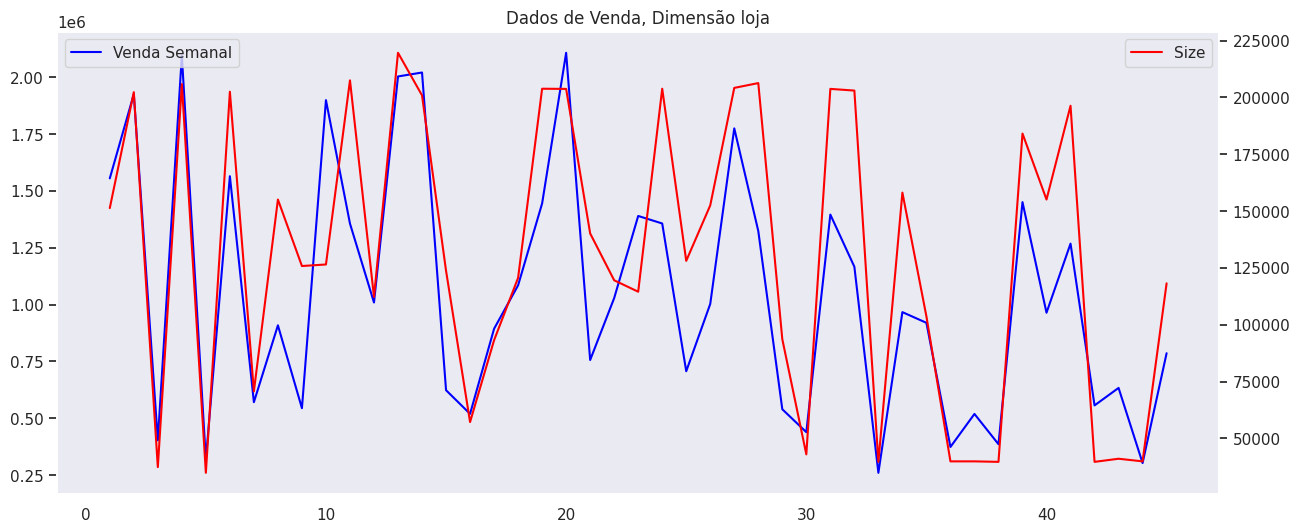

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))

# plotar dados de venda
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.plot(walmart_Dimensão['Número_loja'], walmart_Dimensão['Venda_Semanal'], color='blue')

# criar segundo eixo y
ax2 = ax1.twinx()

# plotar dados de temperatura, preço do combustível e taxa de desemprego
ax2.set_ylabel('')
ax2.plot(walmart_Dimensão['Número_loja'], walmart_Dimensão['Size'], color='red')

# definir legendas
ax1.legend(['Venda Semanal'], loc='upper left')
ax2.legend(['Size'], loc='upper right')

# definir título do gráfico
plt.title('Dados de Venda, Dimensão loja')


In [ ]:
Max_venda_loja.to_excel('Vendas_max_min.xlsx', index=False)